In [3]:
print(1+3)


4


In [5]:
import math
print(math.sin(math.pi/6))

0.49999999999999994


In [4]:
import numpy as np
a=np.array([[1,2,1],[1,0,2],[3,2,1]])
b=np.array([[2,3,1],[1,2,4],[2,1,3]])
c=np.array([0,4,3])
print(np.linalg.inv(a),"\n")
print(np.linalg.matrix_power(b,3),"\n")
print(np.linalg.solve(a,c),"\n")
print(np.linalg.inv(b))

[[-0.5    0.     0.5  ]
 [ 0.625 -0.25  -0.125]
 [ 0.25   0.5   -0.25 ]] 

[[ 65  70 112]
 [ 77  79 119]
 [ 63  70 100]] 

[ 1.5   -1.375  1.25 ] 

[[ 0.125  -0.5     0.625 ]
 [ 0.3125  0.25   -0.4375]
 [-0.1875  0.25    0.0625]]


In [3]:
#using sympy to integrate
from sympy import *

x=symbols('x')
integrate(x**2+2*x,(x,1,3))


50/3

In [24]:
integrate(x**2+2*x)

x**3/3 + x**2

In [33]:
#using sympy to solve ode
from sympy.interactive import printing
printing.init_printing(use_latex=True)
from sympy import *
import sympy as sp

f= sp.Function('f')(x)
print(f)
diffeq = Eq(f.diff(x,2)-5*f,0)

print(diffeq)
dsolve(diffeq,f)

f(x)
Eq(-5*f(x) + Derivative(f(x), (x, 2)), 0)


           -√5⋅x       √5⋅x
f(x) = C₁⋅ℯ      + C₂⋅ℯ    

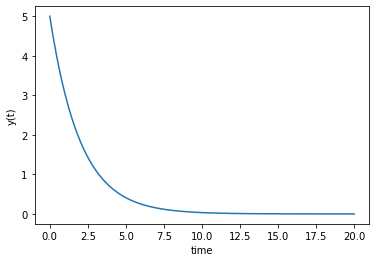

In [6]:
#using scipy to solve ode
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def model(y,t):
    k=0.5
    dydt= -k*y
    return dydt

y0=5
t=np.linspace(0,20,100)

y = odeint(model,y0,t)

plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()


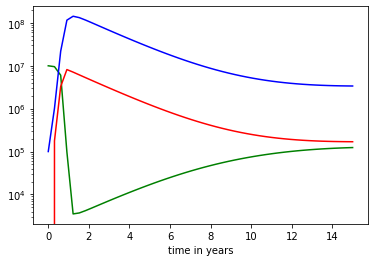

In [32]:
#HIV spread simulation
kr1 = 1e5 #new healthy cells per year
kr2 = 0.1 #death rate of healthy cells
kr3 = 2e-7 #healthy cells converting to infected cells
kr4 = 0.5 #death rate of infected cells
kr5 = 5 #death rate of virus
kr6 = 100 #production of virus by infected cells
def model(z,t):
    dhdt = kr1-kr2*z[0]-kr3*z[0]*z[2]
    didt=kr3*z[0]*z[2]-kr4*z[1]
    dvdt= -kr3*z[0]*z[2]-kr5*z[2]+kr6*z[1]
    dzdt = [dhdt,didt,dvdt]
    return dzdt

z0=[10000000,0,100000]
t= np.linspace(0,15)
z= odeint(model,z0,t)
h= z[:,0] #healthy cells over time
i= z[:,1] # infected cells over time
v= z[:,2] # virus count over time
plt.semilogy(t,h,'g-',label=r'healthy')
plt.semilogy(t,i,'r-',label=r'infected')
plt.semilogy(t,v,'b-',label=r'virus_count')
plt.xlabel('time in years')

plt.show()

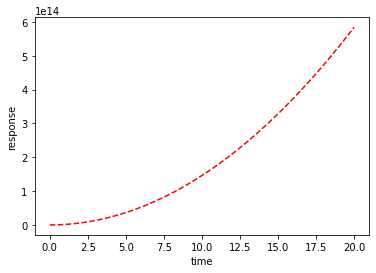

In [16]:
#Solving a complex Bernoulli's ODE
def model(y,t):
    dydt = float(t**5*sin(2*t)-t**3+4*t**4 +2*y)/t
    return dydt
t= np.linspace(0.00001,20,100)
y0=np.pi**4*1.5

y=odeint(model,y0,t)
plt.plot(t,y,'r--')
plt.xlabel('time')
plt.ylabel('response')
plt.show()
